In [14]:
import numpy as np
import skimage
import skimage.io
import sys
sys.path.append("/users/bisma/.../gaving/")
import proto_mpeg
import matplotlib.pyplot as plt
import time

In [15]:
# All the 'blk' mentioned below mean 8x8 macroblocks
# Not 16x16 blocks

In [16]:
def blkcost(blk1, blk2):
    return np.sum((blk1 - blk2)**2)

In [20]:
def fmwrap(frame, motion, blksize=16):
    wrappedfm = frame.getFrame()
    row, col, tmp = motion.shape
    
    for i in range(row):
        for j in range(col):
            X = motion[i,j,0]
            Y = motion[i,j,1]
            wrappedfm[Y+i*blksize:Y+(i+1)*blksize, X+j*blksize:X+(j+1)*blksize,:] = frame.getFrame()[i*blksize:(i+1)*blksize, j*blksize:(j+1)*blksize,:]
    return wrappedfm

In [36]:
def blkmatch(frame1, frame2, blksize=16, scpsize=7):
    gsframe1 = skimage.color.rgb2gray(frame1.getFrame())
    gsframe2 = skimage.color.rgb2gray(frame2.getFrame())
    row, col = gsframe1.shape
    
    wrappedfm1 = frame1.getFrame()
    hlfblksize = int(blksize/2)
    
    # frame1_mot = np.zeros(int(row/blksize), int(col/blksize),2)
    tmp = [[0,0] for _ in range(image1.shape[0])]
    frame1_mot = np.array([tmp for _ in range(image1.shape[1])])
    
    for i in range(hlfblksize, row, blksize):
        for j in range(hlfblksize, col, blksize):
            ref_blk = gsframe1[i-hlfblksize:i+hlfblksize, j-hlfblksize:j+hlfblksize]
            min_cost = 1000000
            for u in range(i-scpsize,i+scpsize+1):
                for v in range(j-scpsize,j+scpsize+1):
                    if (u >= hlfblksize and v >= hlfblksize and u+hlfblksize <= row and v+hlfblksize <= col):
                        current_blk = gsframe2[u-hlfblksize:u+hlfblksize, v-hlfblksize:v+hlfblksize]
                        current_cost = blkcost(ref_blk,current_blk)
                        if (current_cost < min_cost):
                            min_cost = current_cost
                            Y = u-i
                            X = v-j
            wrappedfm1[Y+i-hlfblksize:Y+i+hlfblksize,X+j-hlfblksize:X+j+hlfblksize,:] = frame1.getFrame()[i-hlfblksize:i+hlfblksize,j-hlfblksize:j+hlfblksize,:]
            frame1_mot[int((i-hlfblksize)/blksize),int((j-hlfblksize)/blksize),0] = X
            frame1_mot[int((i-hlfblksize)/blksize),int((j-hlfblksize)/blksize),1] = Y
    error = wrappedfm1 - frame2.getFrame()
    return frame1_mot, error, wrappedfm1


(360, 640, 3)
(360, 640, 3)
2.181913137435913


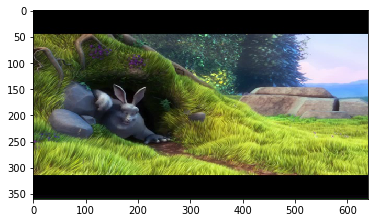

In [39]:
image1 = plt.imread('scene00001.jpg')
image2 = plt.imread('scene00002.jpg')
print(image1.shape)
print(image2.shape)
fr1 = proto_mpeg.Frame(image1)
fr2 = proto_mpeg.Frame(image2)

start = time.time()
fr1mot, error, wrappedfm1 = blkmatch(fr1, fr2, blksize=16, scpsize=7)

print(time.time() - start)

plt.imshow(fr2.getFrame())
